# Plate and Serial Detection Training

## Install Dependencies

In [1]:
# clone YOLOv5 Repository
# !git clone https://github.com/ultralytics/yolov5
!pwd
%cd yolov5

/home/nattkorat/Desktop/klpr-training
/home/nattkorat/Desktop/klpr-training/yolov5


In [8]:
# install requirements of yolov5
# %cd yolov5
# !pip install -r requirements.txt

/home/natt.korat/klpr/yolov5
Keyring is skipped due to an exception: 'keyring.backends'
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 184 kB 1.9 MB/s            
     |████████████████████████████████| 11.2 MB 150 kB/s            
     |████████████████████████████████| 15.7 MB 249 kB/s            
     |████████████████████████████████| 3.4 MB 1.9 MB/s            
  Using cached thop-0.1.1.post2209072238-py3-none-any.whl (15 kB)
  Using cached tqdm-4.65.0-py3-none-any.whl (77 kB)
     |████████████████████████████████| 611 kB 2.8 MB/s            
     |████████████████████████████████| 11.3 MB 2.0 MB/s            
  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)
  Using cached setuptools-67.8.0-py3-none-any.whl (1.1 MB)
     |████████████████████████████████| 62 kB 306 kB/s            
     |████████████████████████████████| 965 kB 851 kB/s            
  Consider adding this directory to PATH or, if you pre

In [60]:
# add configure to ClearMl for visualizing the Training Process
# !pip install clearml
# !clearml-init

/usr/bin/sh: 1: clearml-init: not found


### Display Dataset for Training

In the datasets, There are 1,584 images annotated and split into 3 categories such as 990 for training set, 228 for validation set, and 306 for testing set. The dataset is prepared follow as the format of YOLOv5 which all annotated store in txt file using the same name corespond to the image's name.

There is already having a configure file .yalm which store the meta data about the datasets for training and testing the model.

In [5]:
import os

def get_image_filenames(dataset_dir, limit = 5):
    image_filenames = []
    i = 0
    for dirpath, dirnames, filenames in os.walk(dataset_dir):
        for filename in filenames:
            i += 1
            if i > limit:
                break
            if filename.endswith('.jpg') or filename.endswith('.png'):  # Add or change the file extensions as needed
                base_filename = os.path.basename(filename)
                image_filenames.append(base_filename)
    return image_filenames

def replace_extension_with_txt(filenames):
    # Make a copy of the list
    new_filenames = filenames.copy()

    # Replace the extension of each filename in the copy
    new_filenames = [os.path.splitext(filename)[0] + '.txt' for filename in new_filenames]

    return new_filenames

In [6]:
import cv2
from matplotlib import pyplot as plt

def plot_image_with_bboxes(ax, image_path, label_path):
    # Read the image
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h, w, _ = img.shape

    # Read the bounding box data
    with open(label_path, 'r') as f:
        bboxes = f.readlines()

    # Plot the bounding boxes on the image
    ax.imshow(img)

    for bbox in bboxes:
        bbox = bbox.strip().split()
        class_number, x_center, y_center, width, height = map(float, bbox)
        x_center *= w
        y_center *= h
        width *= w
        height *= h
        xmin = x_center - width/2
        ymin = y_center - height/2
        if class_number == 0:
            rect = plt.Rectangle((xmin, ymin), width, height, fill=False, edgecolor='red')
        else:
            rect = plt.Rectangle((xmin, ymin), width, height, fill=False, edgecolor='green')
        ax.add_patch(rect)

    

#### Training Set


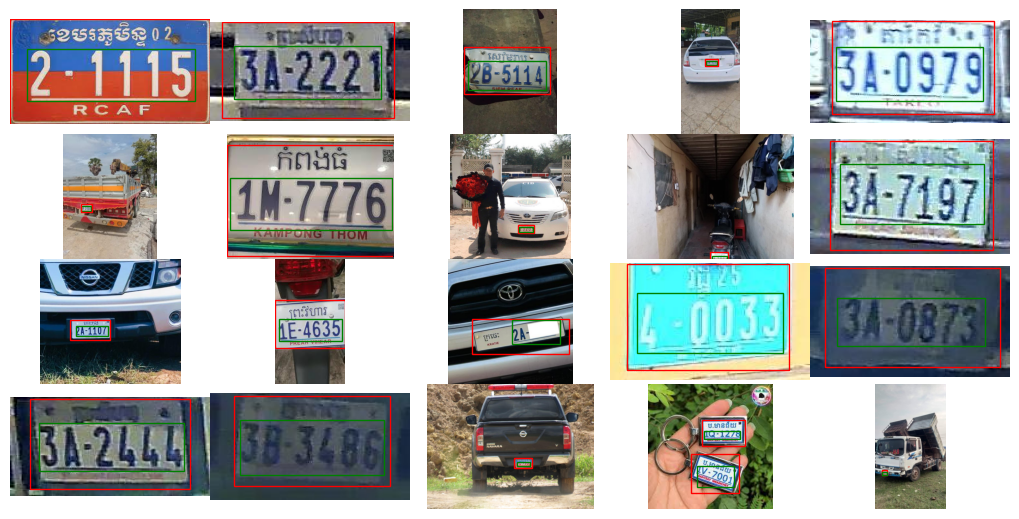

In [5]:
image_dir = './datasets/train/images/'
label_dir = './datasets/train/labels/'
image_filenames = get_image_filenames(image_dir, 20)

label_filenames = replace_extension_with_txt(image_filenames)

num_rows = 4
num_cols = 5

fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 5))
# Remove horizontal space between axes
fig.subplots_adjust(wspace=0, hspace=0)

for i in range(len(image_filenames)):
    img = os.path.join(image_dir, image_filenames[i])
    lb = os.path.join(label_dir, label_filenames[i])
    
    # plot the image
    plot_image_with_bboxes(axs[i // num_cols, i % num_cols], img, lb)
    
    # Remove axis
    axs[i // num_cols, i % num_cols].axis('off')

# Remove space between subplots and around them
plt.tight_layout(pad=0)
plt.show()

#### Validation Set

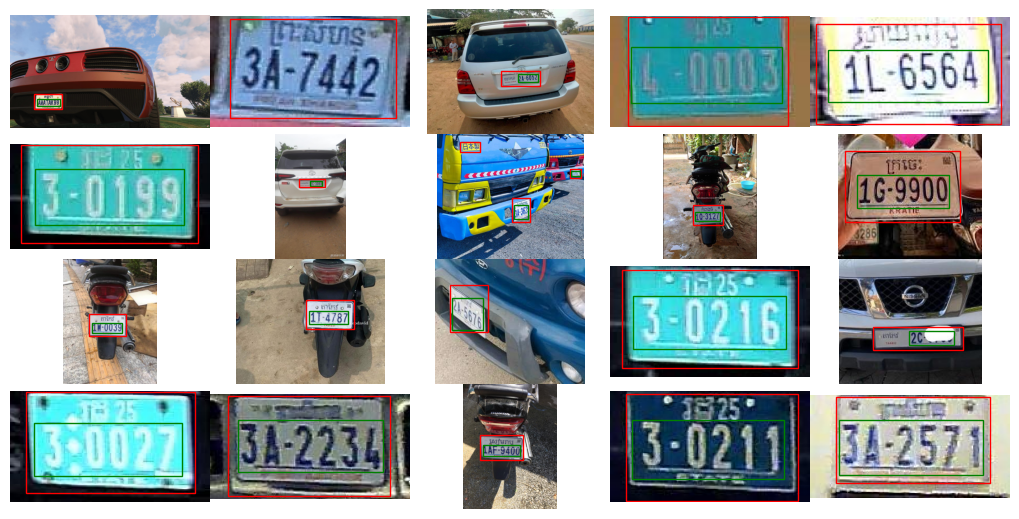

In [6]:
image_dir = './datasets/valid/images/'
label_dir = './datasets/valid/labels/'
image_filenames = get_image_filenames(image_dir, 20)

label_filenames = replace_extension_with_txt(image_filenames)

num_rows = 4
num_cols = 5

fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 5))
# Remove horizontal space between axes
fig.subplots_adjust(wspace=0, hspace=0)

for i in range(len(image_filenames)):
    img = os.path.join(image_dir, image_filenames[i])
    lb = os.path.join(label_dir, label_filenames[i])
    
    # plot the image
    plot_image_with_bboxes(axs[i // num_cols, i % num_cols], img, lb)
    
    # Remove axis
    axs[i // num_cols, i % num_cols].axis('off')

# Remove space between subplots and around them
plt.tight_layout(pad=0)
plt.show()

#### Testing Set

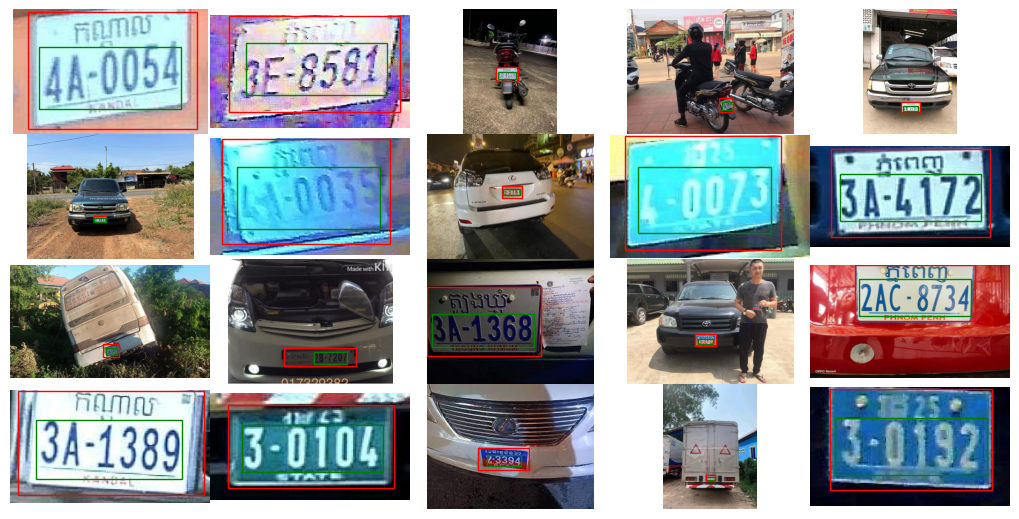

In [7]:
image_dir = './datasets/test/images/'
label_dir = './datasets/test/labels/'
image_filenames = get_image_filenames(image_dir, 20)

label_filenames = replace_extension_with_txt(image_filenames)

num_rows = 4
num_cols = 5

fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 5))
# Remove horizontal space between axes
fig.subplots_adjust(wspace=0, hspace=0)

for i in range(len(image_filenames)):
    img = os.path.join(image_dir, image_filenames[i])
    lb = os.path.join(label_dir, label_filenames[i])
    
    # plot the image
    plot_image_with_bboxes(axs[i // num_cols, i % num_cols], img, lb)
    
    # Remove axis
    axs[i // num_cols, i % num_cols].axis('off')

# Remove space between subplots and around them
plt.tight_layout(pad=0)
plt.show()

## Training Model

In [65]:
!python train.py --img 640 --epochs 100 --data datasets/data.yaml --weights yolov5l.pt

train: weights=yolov5l.pt, cfg=, data=datasets/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-185-g2334aa7 Python-3.7.6 torch-1.13.1+cu117 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11019MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.01

      31/99      7.38G    0.03279    0.01075    0.01435         46        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        228        496      0.947      0.888      0.941      0.735

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      32/99      7.38G     0.0326     0.0109    0.01432         70        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        228        496      0.873      0.828       0.92      0.717

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      33/99      7.38G    0.03248    0.01078    0.01437         74        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        228        496      0.951      0.898      0.949      0.753

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      34/9

      56/99      7.38G    0.02986   0.009565    0.01351         68        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        228        496      0.968      0.891      0.944      0.759

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      57/99      7.38G    0.02929   0.009964    0.01366         65        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        228        496      0.955      0.878      0.939      0.758

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      58/99      7.38G      0.029   0.009715    0.01327         80        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        228        496      0.963      0.876       0.94      0.773

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      59/9

      81/99      7.38G    0.02759   0.008798    0.01337         62        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        228        496      0.951      0.907      0.948      0.787

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      82/99      7.38G    0.02718   0.009038    0.01316         73        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        228        496       0.95      0.905      0.949       0.79

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      83/99      7.38G    0.02732   0.008467    0.01324         65        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        228        496      0.946      0.887      0.946      0.788

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      84/9

### Visualizing the Model

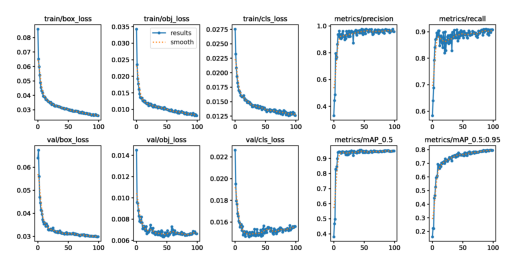

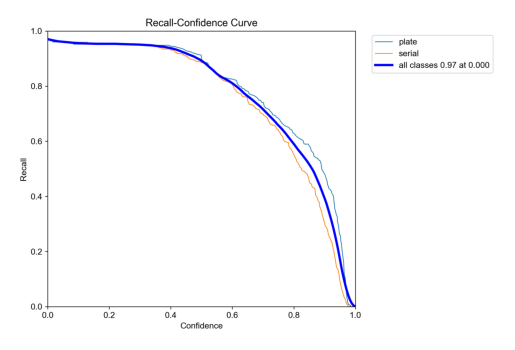

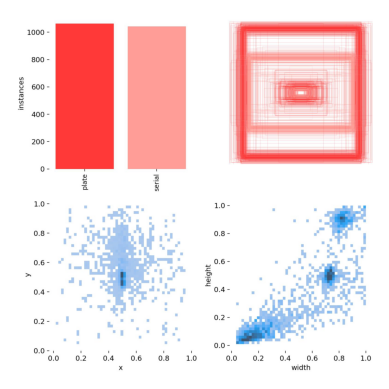

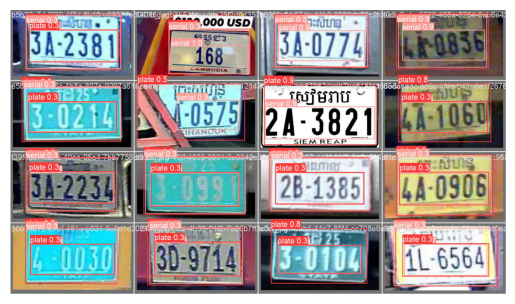

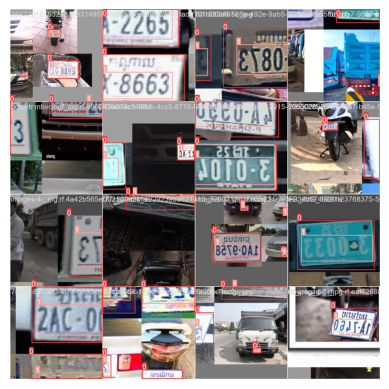

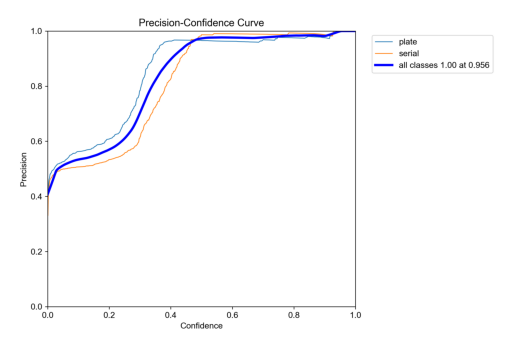

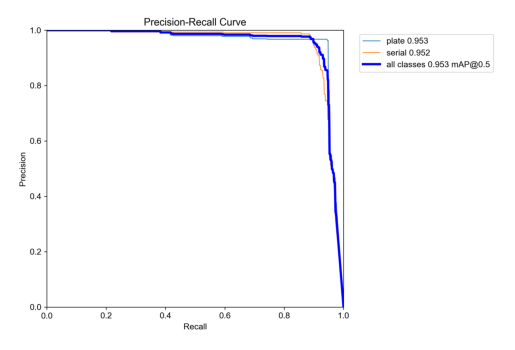

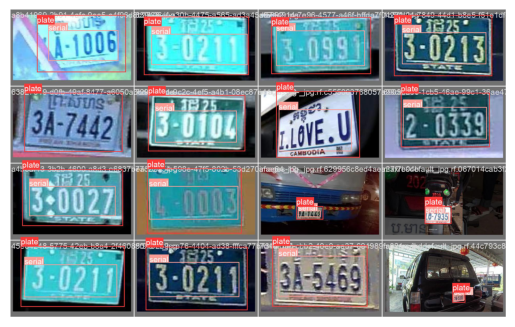

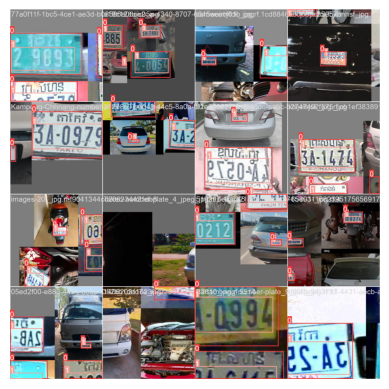

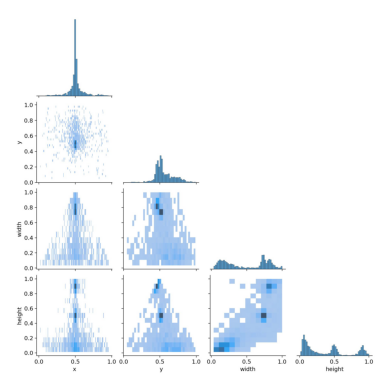

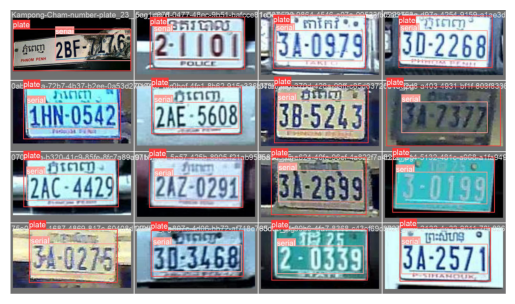

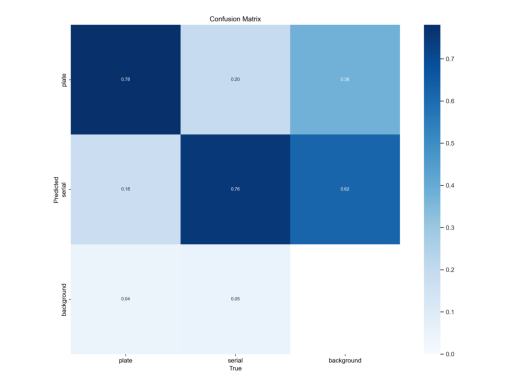

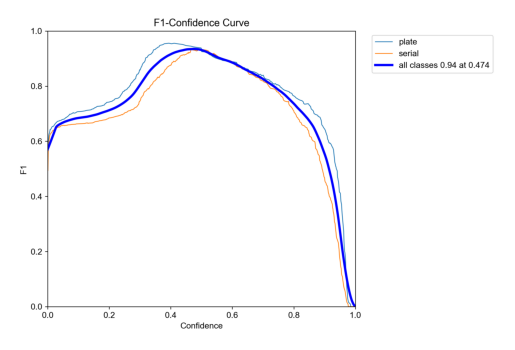

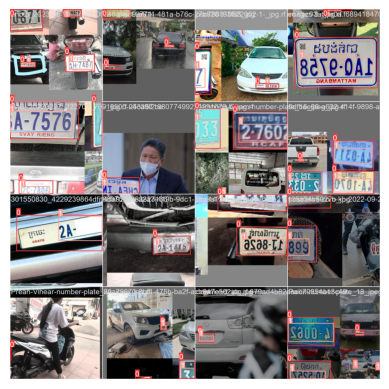

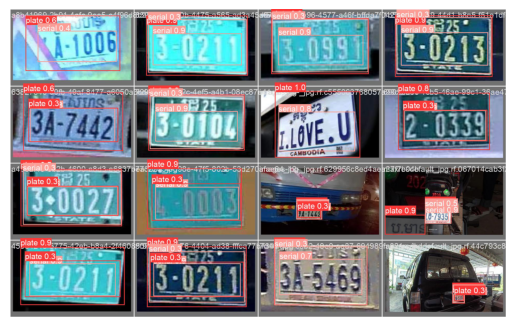

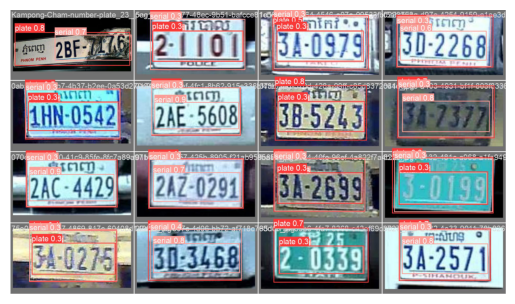

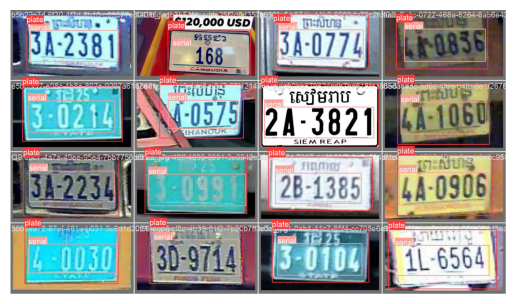

In [7]:
def visualize_images_in_folder(folder_path):
    # Get list of all image filenames (with .jpg, .jpeg, .png, .tif, or .bmp extensions)
    image_files = [f for f in os.listdir(folder_path) 
                   if os.path.isfile(os.path.join(folder_path, f)) and 
                   f.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp'))]

    # For each image, read and display it
    for image_file in image_files:
        image_path = os.path.join(folder_path, image_file)
        
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # convert color from BGR to RGB
        
        plt.figure()  # create a new figure for each image
        plt.imshow(img)
        plt.axis('off')  # no axis for this plot

    plt.show()

# Usage:
visualize_images_in_folder('runs/train/exp3')
    

### Evaluation the Model with the Testing Set

In [2]:
# Validate with testing set
!python val.py --task test --weights runs/train/exp3/weights/best.pt --data datasets/data.yaml

val: data=datasets/data.yaml, weights=['runs/train/exp3/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-185-g2334aa7 Python-3.10.12 torch-2.1.0.dev20230706+cu121 CUDA:0 (NVIDIA GeForce RTX 4070, 12006MiB)

Fusing layers... 
Model summary: 267 layers, 46113663 parameters, 0 gradients, 107.7 GFLOPs
test: Scanning /home/nattkorat/Desktop/klpr-training/yolov5/datasets/test/labels
test: New cache created: /home/nattkorat/Desktop/klpr-training/yolov5/datasets/test/labels.cache
                 Class     Images  Instances          P          R      mAP50   
                   all        306        656      0.973      0.936      0.977      0.816
                 plate        306        333      0.975      0.925      0.977      

confusion_matrix.png  R_curve.png	     val_batch1_pred.jpg
F1_curve.png	      val_batch0_labels.jpg  val_batch2_labels.jpg
P_curve.png	      val_batch0_pred.jpg    val_batch2_pred.jpg
PR_curve.png	      val_batch1_labels.jpg


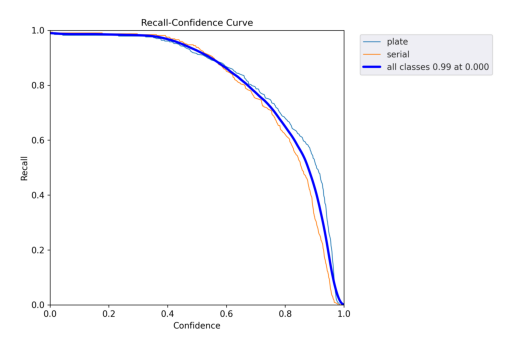

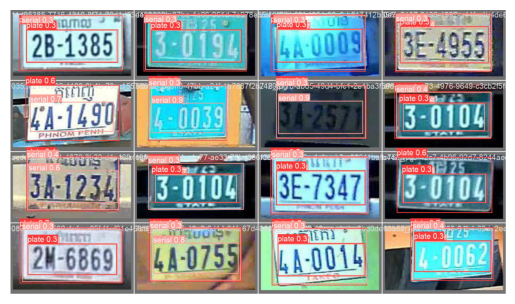

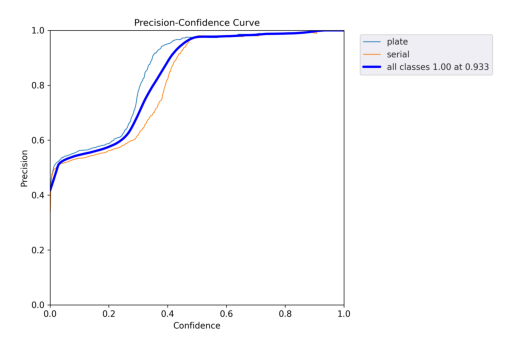

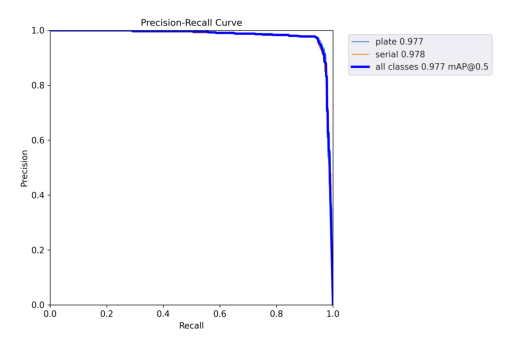

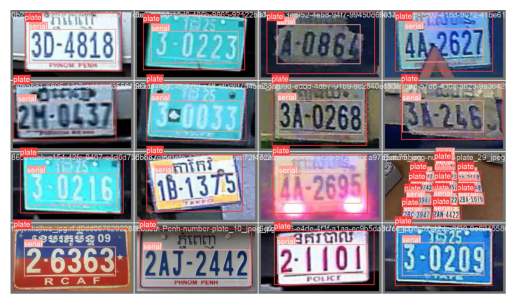

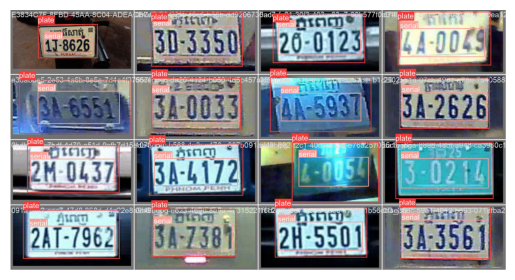

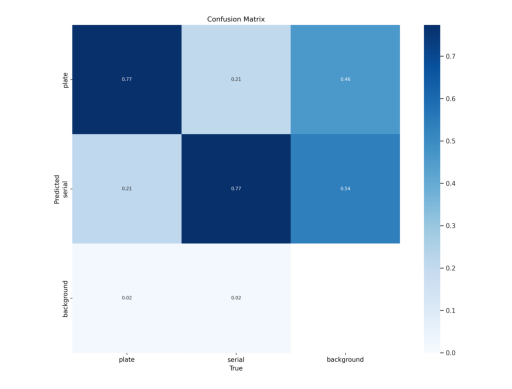

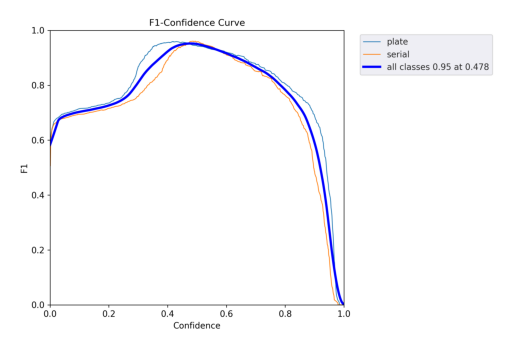

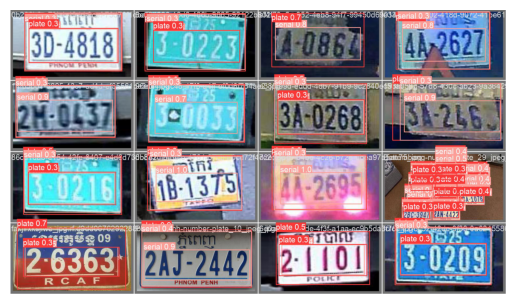

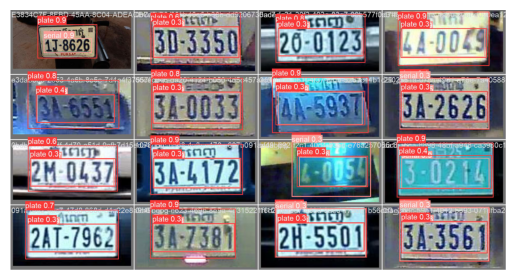

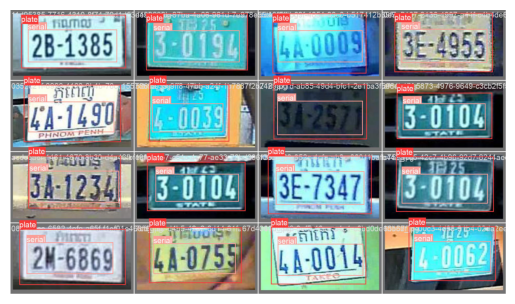

In [8]:
!ls runs/val/exp
visualize_images_in_folder('runs/val/exp5')